In [1]:
import pandas as pd
import os
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [2]:
load_dotenv(find_dotenv())
COG_KEY = os.getenv('COG_KEY')
COG_ENDPOINT = os.getenv('COG_ENDPOINT')

In [3]:
df = pd.read_csv('output/filtered_amz_questions.csv')

In [4]:
df.head()

,Unnamed: 0,question
0,0,Where is the collagen sourced from? i.e Countr...
1,1,Do you test your product for heavy metals and ...
2,2,Does it have type1& 3 collagen?
3,3,what is the molecular weight in daltons?
4,4,Is it Milk free


In [5]:
df = df.rename(columns={"Unnamed: 0": "id", "question": "text"})

In [6]:
questions = df.to_dict('records')

In [7]:
from azure.cognitiveservices.language.textanalytics import TextAnalyticsClient
from msrest.authentication import CognitiveServicesCredentials

text_analytics_client = TextAnalyticsClient(endpoint=COG_ENDPOINT,
                                            credentials=CognitiveServicesCredentials(COG_KEY))

In [8]:
language_analysis = text_analytics_client.detect_language(documents=questions)

In [9]:
# Get key phrases using Azure cognitive services
review_key_phrases = []

key_phrase_analysis = text_analytics_client.key_phrases(documents=questions)

for question_idx in range(len(questions)):
    key_phrases = key_phrase_analysis.documents[question_idx].key_phrases
    # Append the keyphrases to a list
    for key_phrase in key_phrases:
        review_key_phrases.append(key_phrase)

In [10]:
words_text = ' '.join(review_key_phrases)

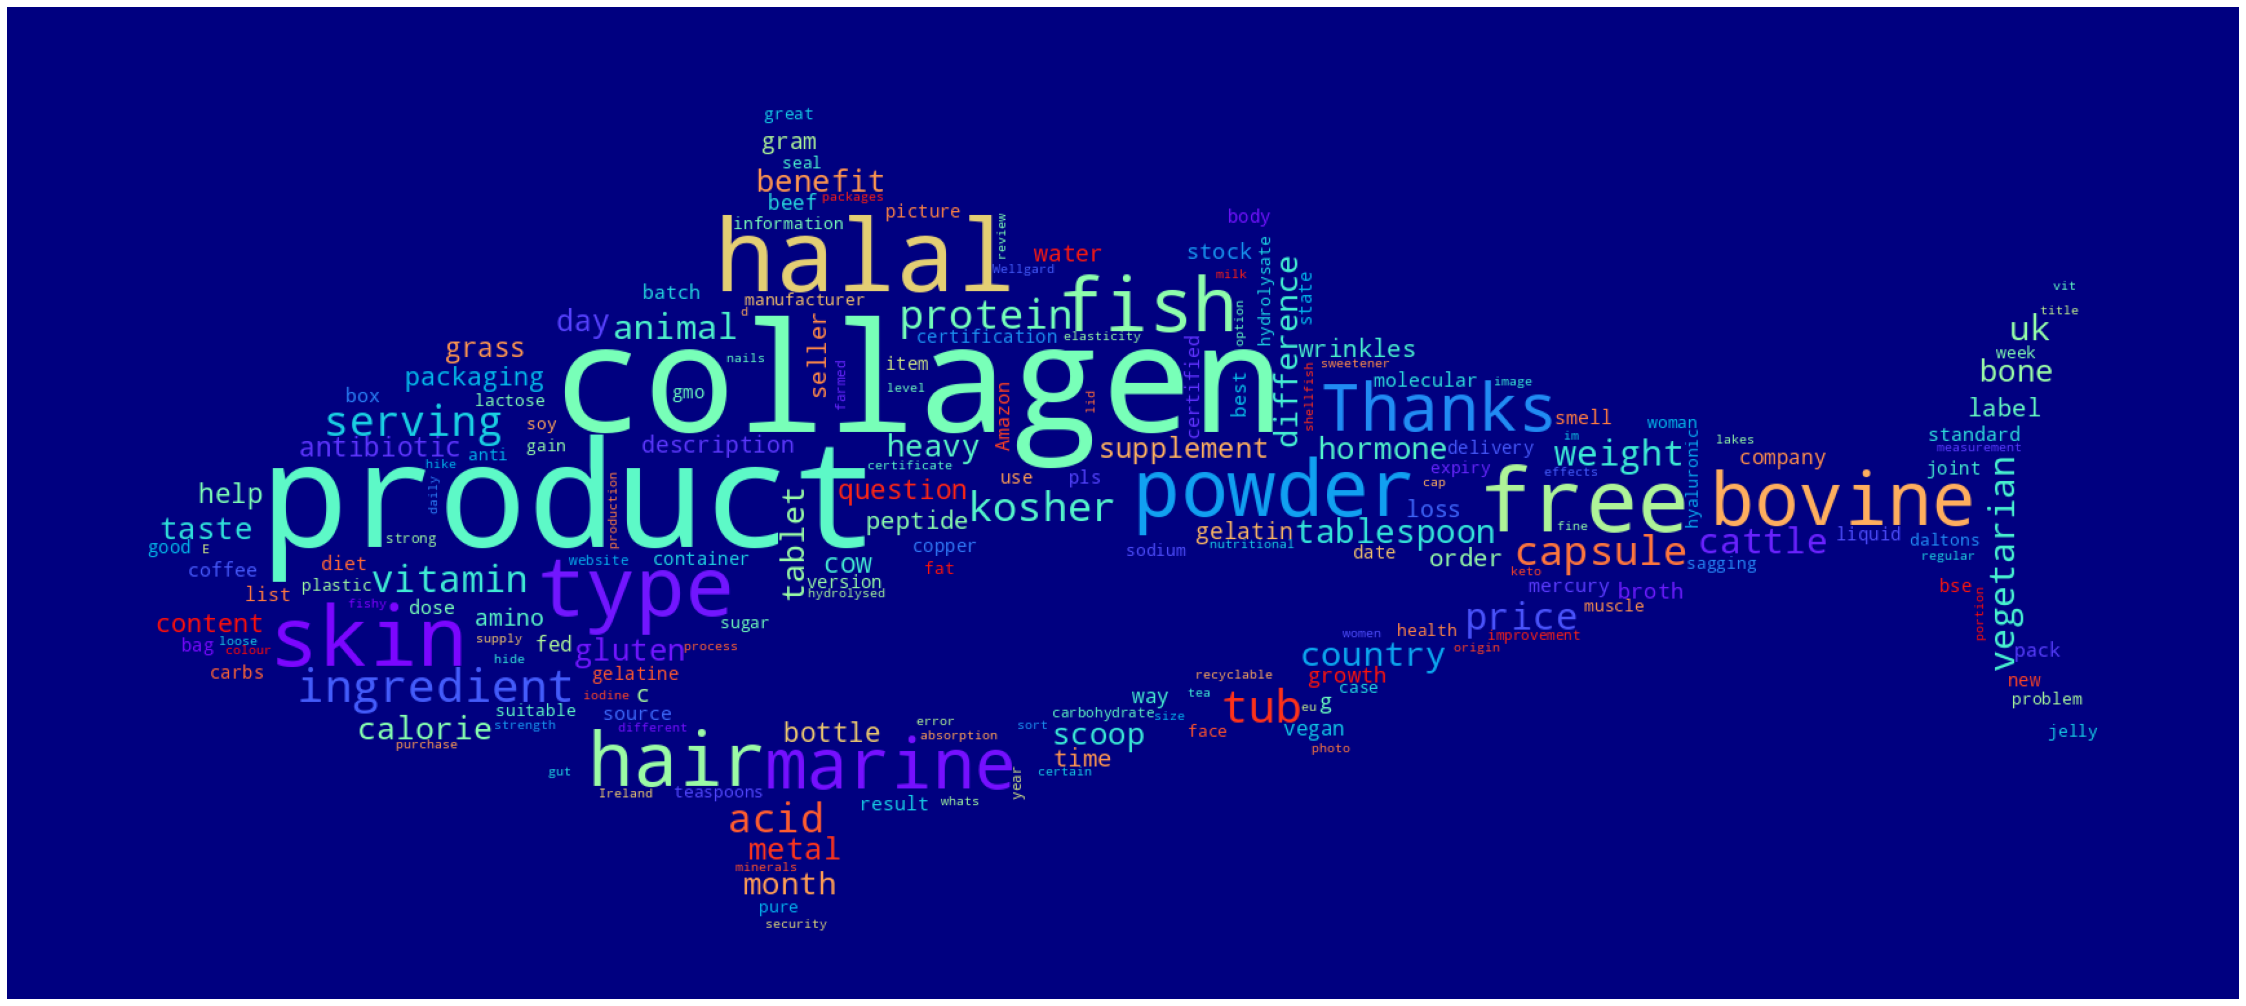

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate wordcloud
mask = np.array(Image.open('input/tuna.png'))
wordcloud = WordCloud(width = 2000, height = 1400, random_state=1, background_color='navy', colormap='rainbow', collocations=False, stopwords = STOPWORDS, mask=mask).generate(words_text)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()
